# Exercise 01

In [94]:
import pandas as pd
import sqlite3

In [95]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

## 1. analyze only the users and not the admins
## 2. analyze only the dates when there were both views and checker commits

In [96]:
sql_query = '''
SELECT datetime
FROM pageviews
WHERE uid LIKE "user_%"
'''

df_view = pd.read_sql(sql_query, connection)
df_view

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [97]:
df_view['datetime'] = pd.to_datetime(df_view['datetime'])
views_date = df_view.groupby(df_view['datetime'].dt.date).size().reset_index(name='views')
views_date.set_index('datetime', inplace=True)
views_date

,views
datetime,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1
2020-04-23,5
2020-04-25,1
2020-04-26,8
2020-04-28,2


In [98]:
sql_query = '''
SELECT timestamp
FROM checker
WHERE uid LIKE "user_%"
'''

df_commit = pd.read_sql(sql_query, connection)
df_commit

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [99]:
df_commit['timestamp'] = pd.to_datetime(df_commit['timestamp']).dt.date
commits_date = df_commit.groupby(df_commit['timestamp']).size().reset_index(name='commits')
commits_date.set_index('timestamp', inplace=True)
commits_date

,commits
timestamp,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25
2020-04-22,28
2020-04-23,43
2020-04-24,16
2020-04-25,104


In [100]:
views_commits = pd.concat([views_date, commits_date], axis=1)
views_commits.dropna(inplace=True)
views_commits

,views,commits
2020-04-17,1.0,23.0
2020-04-18,23.0,69.0
2020-04-19,15.0,33.0
2020-04-21,3.0,25.0
2020-04-22,1.0,28.0
2020-04-23,5.0,43.0
2020-04-25,1.0,104.0
2020-04-26,8.0,261.0
2020-04-28,2.0,5.0
2020-04-29,4.0,17.0


## 3. use size of the font should be 8
## 4. the size of the figure is (15,8)

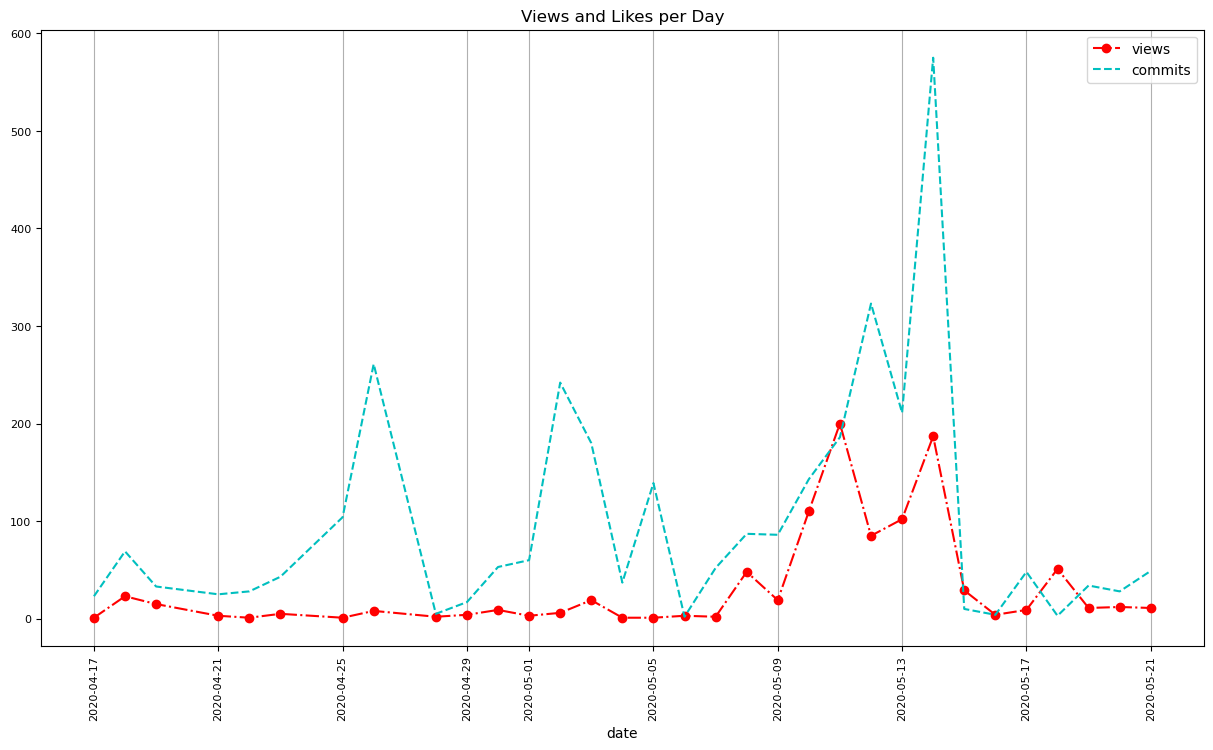

In [210]:
ax = views_commits.plot(
    y=['views', 'commits'], 
    figsize=(15, 8), 
    title='Views and Likes per Day', 
    fontsize=8, 
    xlabel='date', 
    style={
        'views': 'ro-.', 
        'commits': 'c--'
    },
    rot=90,
)
ax.xaxis.grid()

In [ ]:
connection.close()

## 5. at the end of your Jupyter Notebook create a markdown cell and insert the question

How many times was the number of views larger than 150? Insert: **The answeris 2**